In [101]:
import nideconv
from risk_experiment.utils.data import Subject, get_all_subjects, get_all_behavior, get_all_subject_ids
from risk_experiment.utils.math import resample_run

import pandas as pd
from scipy.stats import zscore
from tqdm import tqdm

In [102]:
pupil = []
saccades = []
blinks = []


for sub in tqdm(get_all_subjects('/data/ds-risk')):
    try:
        pupil.append(sub.get_pupil('3t2'))
        saccades.append(sub.get_saccades('3t2'))
        blinks.append(sub.get_blinks('3t2'))
    except Exception as e:
        print(f'issue with subject {sub.subject}')

100%|██████████| 30/30 [00:25<00:00,  1.20it/s]


In [173]:
events = pd.concat([sub.get_fmri_events('3t2') for sub in get_all_subjects('/data/ds-risk')], keys=get_all_subject_ids(), names=['subject'])
events = events[events.apply(lambda row: row['trial_type'].endswith('n1'), 1)]
events['event_type'] = 'n1'

In [104]:
pupil = pd.concat(pupil)
saccades = pd.concat(saccades)
blinks = pd.concat(blinks)

In [105]:
onsets = pd.concat((blinks, saccades), keys=['blink', 'saccade'], names=['event_type']).reset_index('event_type')[['event_type', 'onset']]

<AxesSubplot: xlabel='onset', ylabel='Count'>

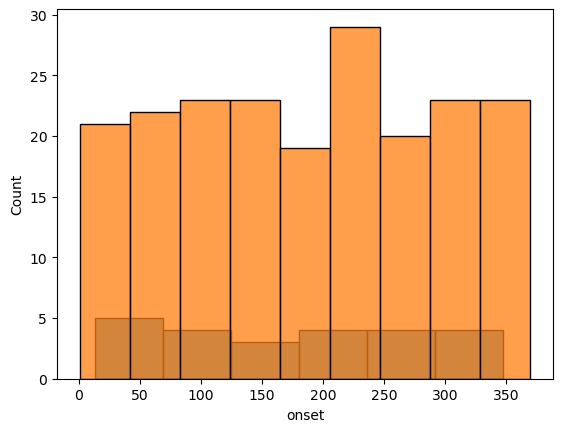

In [144]:
sns.histplot(events.loc[('02', 2)]['onset'])
sns.histplot(blinks.loc[('02', 2)]['onset'])

In [110]:
onsets = pd.concat((events, onsets))

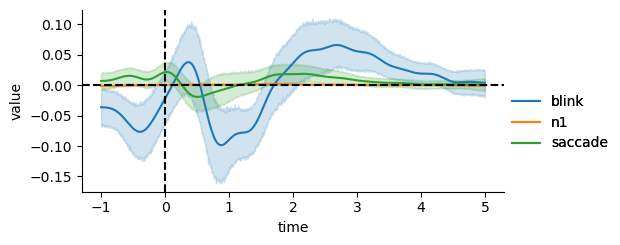

In [128]:
grf = nideconv.GroupResponseFitter(pupil['pupil'], onsets=onsets, input_sample_rate=10)

grf.add_event('saccade', interval=[-1, 5], basis_set='dct', n_regressors=24)
grf.add_event('blink', interval=[-1, 5], basis_set='dct', n_regressors=24)
grf.add_event('n1', interval=[-1, 5], basis_set='dct', n_regressors=10)

grf.fit()

grf.plot_groupwise_timecourses()

In [152]:
pupil.droplevel(-1)

pupil   time
subject run                 
02      1   -0.548040    0.0
        1   -1.111548    0.1
        1   -0.971810    0.2
        1   -1.051286    0.3
        1   -0.988719    0.4
...               ...    ...
32      8    0.234120  369.9
        8    0.155746  370.0
        8    0.287452  370.1
        8    0.403250  370.2
        8    0.531242  370.3

[903224 rows x 2 columns]

In [150]:
onsets

onset  trial_nr    trial_type  duration  n2 event_type
subject run                                                             
02      1     13.276262       1.0  trial_001_n1       0.6 NaN         n1
        1    208.730725      14.0  trial_014_n1       0.6 NaN         n1
        1    318.431699      22.0  trial_022_n1       0.6 NaN         n1
        1    304.270382      21.0  trial_021_n1       0.6 NaN         n1
        1    289.123636      20.0  trial_020_n1       0.6 NaN         n1
...                 ...       ...           ...       ...  ..        ...
32      8    368.384000       NaN           NaN       NaN NaN    saccade
        8    368.646000       NaN           NaN       NaN NaN    saccade
        8    369.076000       NaN           NaN       NaN NaN    saccade
        8    369.402000       NaN           NaN       NaN NaN    saccade
        8    369.854000       NaN           NaN       NaN NaN    saccade

[189810 rows x 6 columns]

In [161]:
events['event_type'] = 'n1'

In [182]:
grf = nideconv.GroupResponseFitter(pupil['pupil'], onsets=onsets[['onset' ,'event_type']], input_sample_rate=10)

grf.add_event('saccade', interval=[-1, 5], basis_set='dct', n_regressors=24)
grf.add_event('blink', interval=[-1, 5], basis_set='dct', n_regressors=24)
grf.add_event('n1', interval=[-4, 5], basis_set='dct', n_regressors=24)

grf.fit()

# grf.plot_groupwise_timecourses()

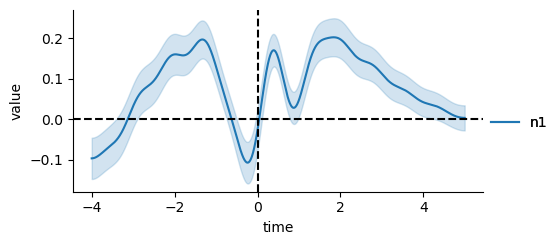

In [183]:
grf.plot_groupwise_timecourses(event_types=['n1'], errorbar='se')

In [176]:
grf.onsets.groupby(['subject', 'run']).apply(lambda d: d.sort_values('onset'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_66570/549774897.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grf.onsets.groupby(['subject', 'run']).apply(lambda d: d.sort_values('onset'))


onset  trial_nr    trial_type  duration  n2
subject run event_type                                                  
02      1   n1           13.276262         1  trial_001_n1       0.6 NaN
            n1           27.921896         2  trial_002_n1       0.6 NaN
            n1           42.567994         3  trial_003_n1       0.6 NaN
            n1           57.246253         4  trial_004_n1       0.6 NaN
            n1           70.873968         5  trial_005_n1       0.6 NaN
...                            ...       ...           ...       ...  ..
32      8   n1          293.598835       188  trial_188_n1       0.6 NaN
            n1          306.754634       189  trial_189_n1       0.6 NaN
            n1          322.412715       190  trial_190_n1       0.6 NaN
            n1          338.071333       191  trial_191_n1       0.6 NaN
            n1          350.716428       192  trial_192_n1       0.6 NaN

[5760 rows x 5 columns]

In [177]:
grf.onsets.groupby('subject').size()

subject
02    192
03    192
04    192
05    192
06    192
07    192
08    192
09    192
10    192
11    192
12    192
13    192
14    192
15    192
16    192
17    192
18    192
19    192
20    192
21    192
22    192
23    192
25    192
26    192
27    192
28    192
29    192
30    192
31    192
32    192
dtype: int64

In [164]:
events

onset  trial_nr    trial_type  duration    n2 event type  \
subject run                                                                  
02      1     13.276262         1  trial_001_n1       0.6   NaN         n1   
        1    341.277188        23         n2_11       0.6  11.0         n1   
        1    325.629274        22          n2_9       0.6   9.0         n1   
        1    312.469809        21         n2_13       0.6  13.0         n1   
        1    298.341343        20         n2_59       0.6  59.0         n1   
...                 ...       ...           ...       ...   ...        ...   
32      8    293.598835       188  trial_188_n1       0.6   NaN         n1   
        8    306.754634       189  trial_189_n1       0.6   NaN         n1   
        8    322.412715       190  trial_190_n1       0.6   NaN         n1   
        8    175.898927       180  trial_180_n1       0.6   NaN         n1   
        8    357.904390       192         n2_28       0.6  28.0         n1   

            event_type  
subject run             
02      1           n1  
        1           n1  
        1           n1  
        1           n1  
        1           n1  
...                ...  
32      8           n1  
        8           n1  
        8           n1  
        8           n1  
        8           n1  

[11520 rows x 7 columns]

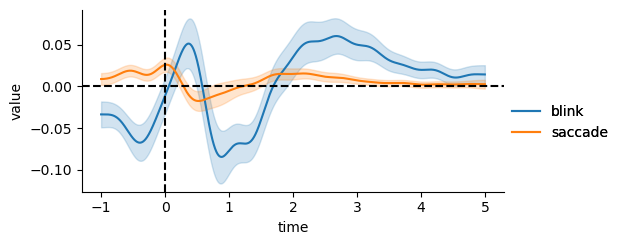

In [65]:
grf.plot_groupwise_timecourses(errorbar='se')

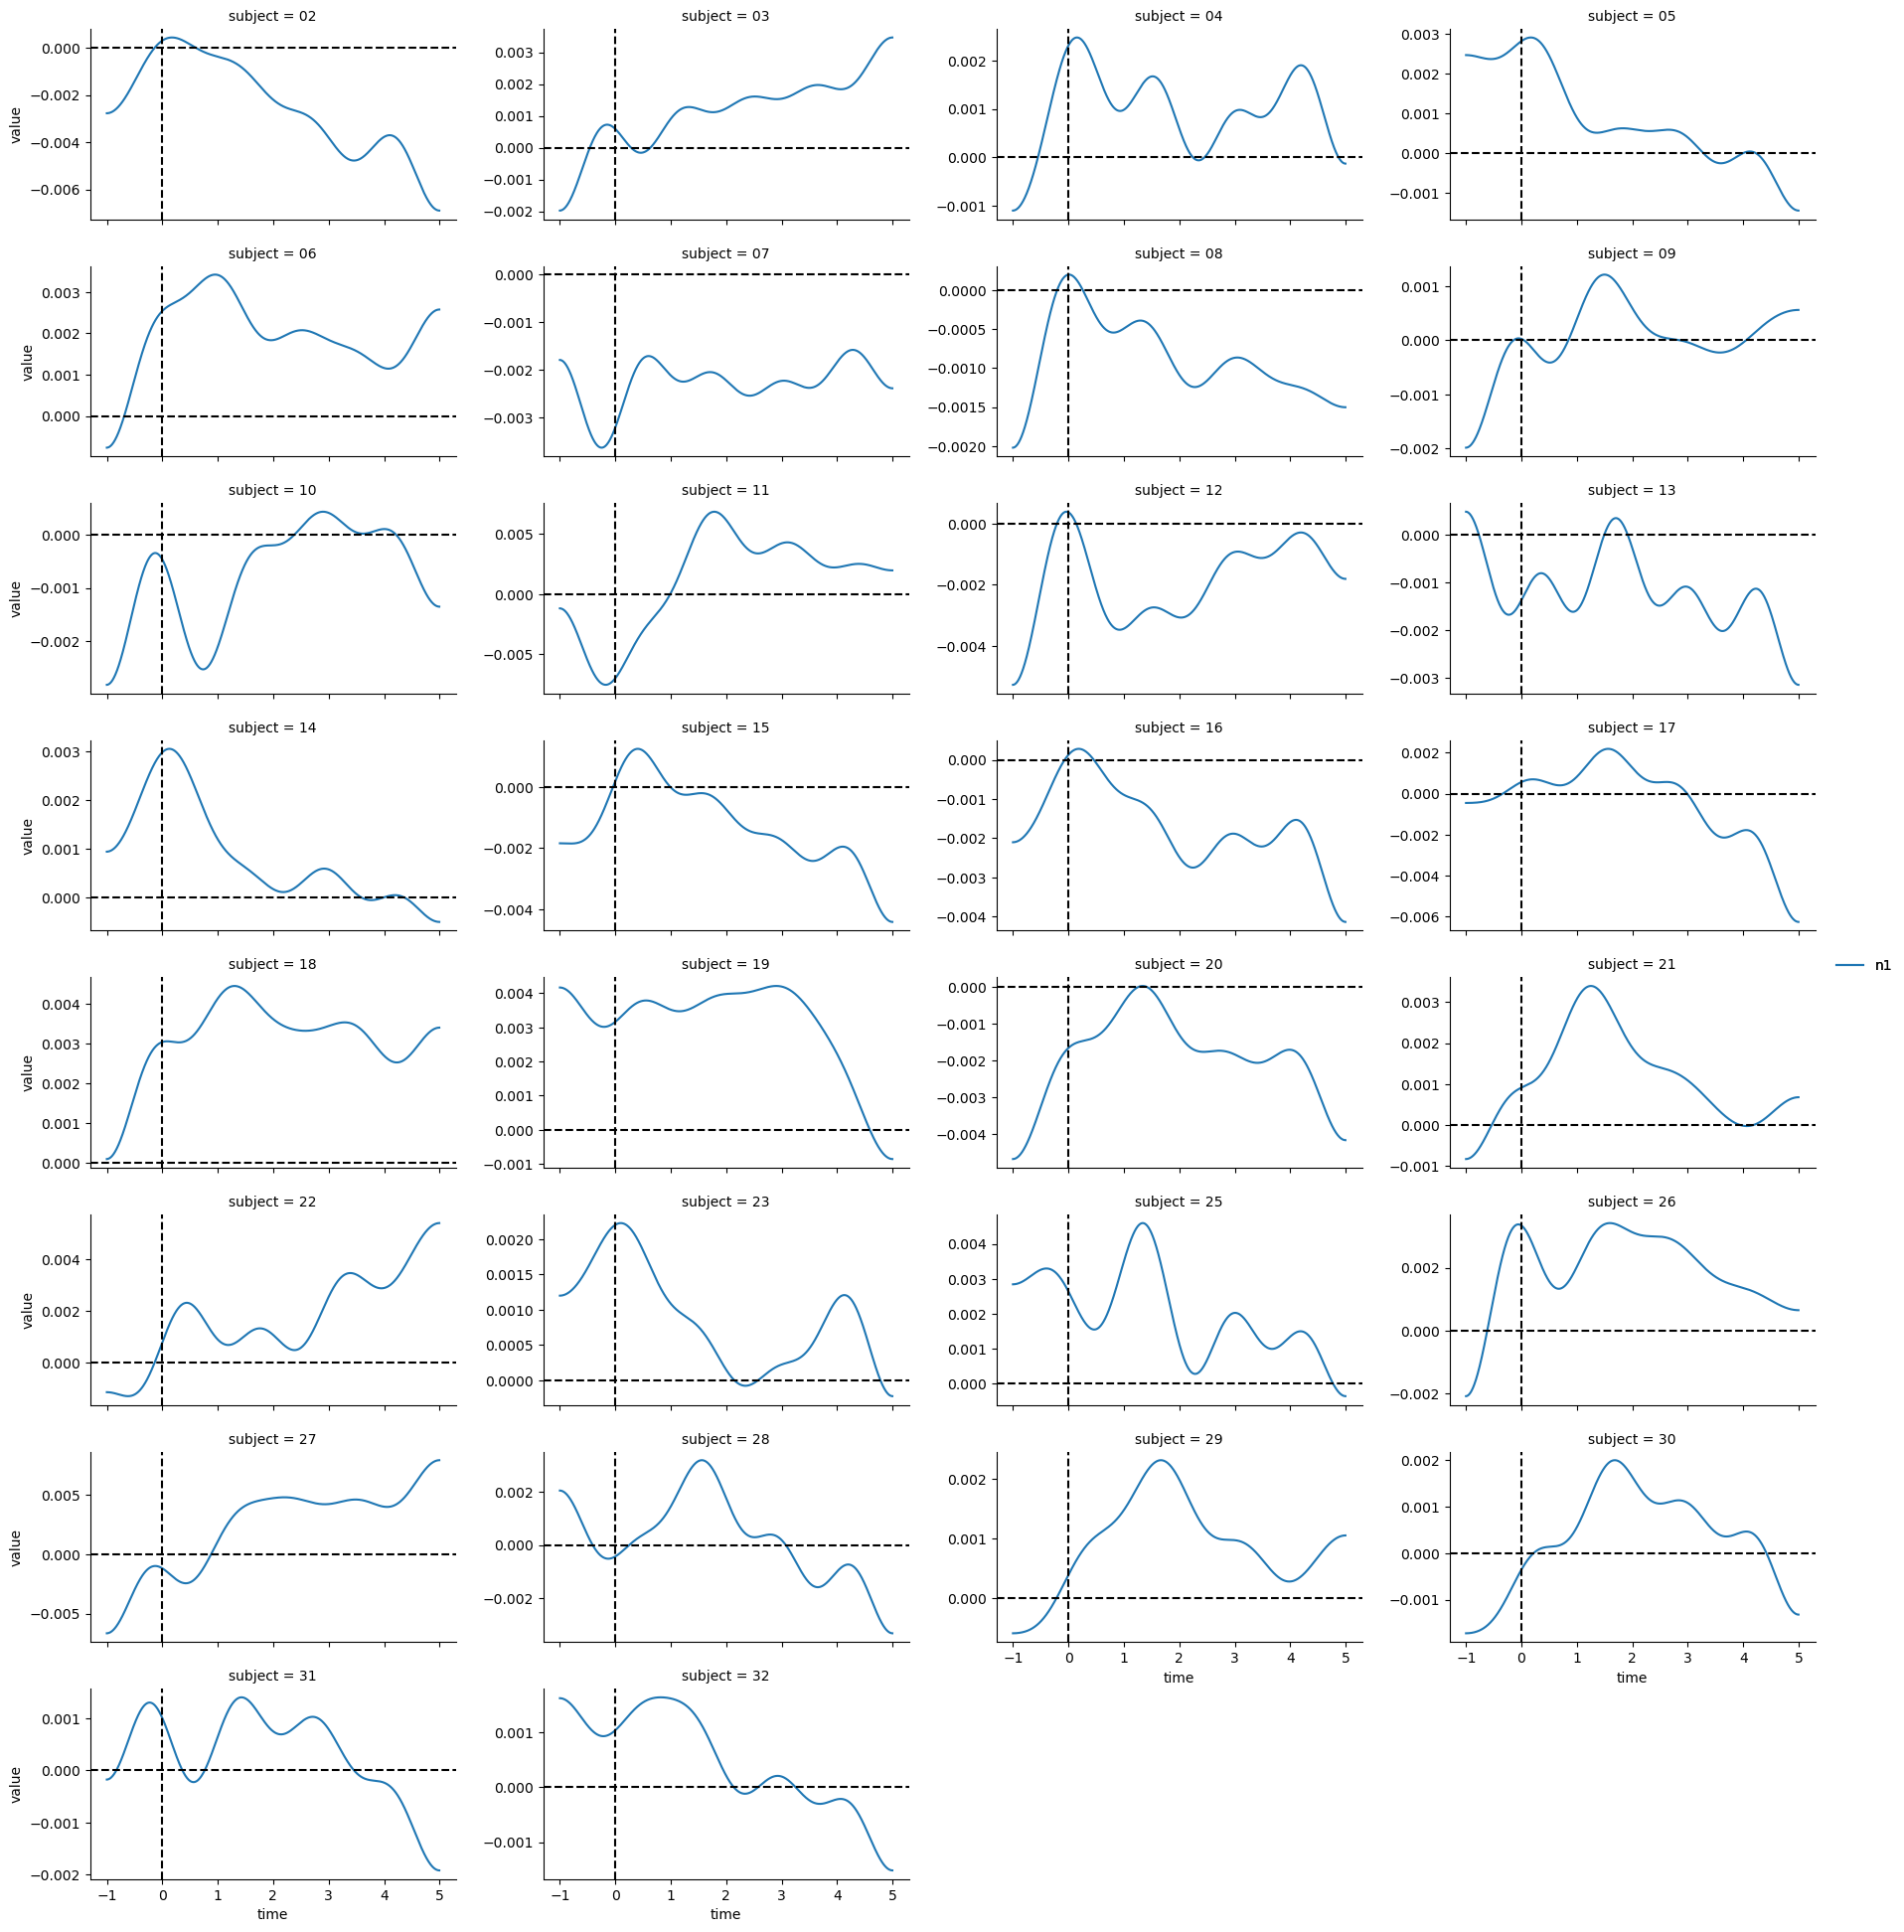

In [135]:
grf.plot_subject_timecourses()

In [67]:
import seaborn as sns

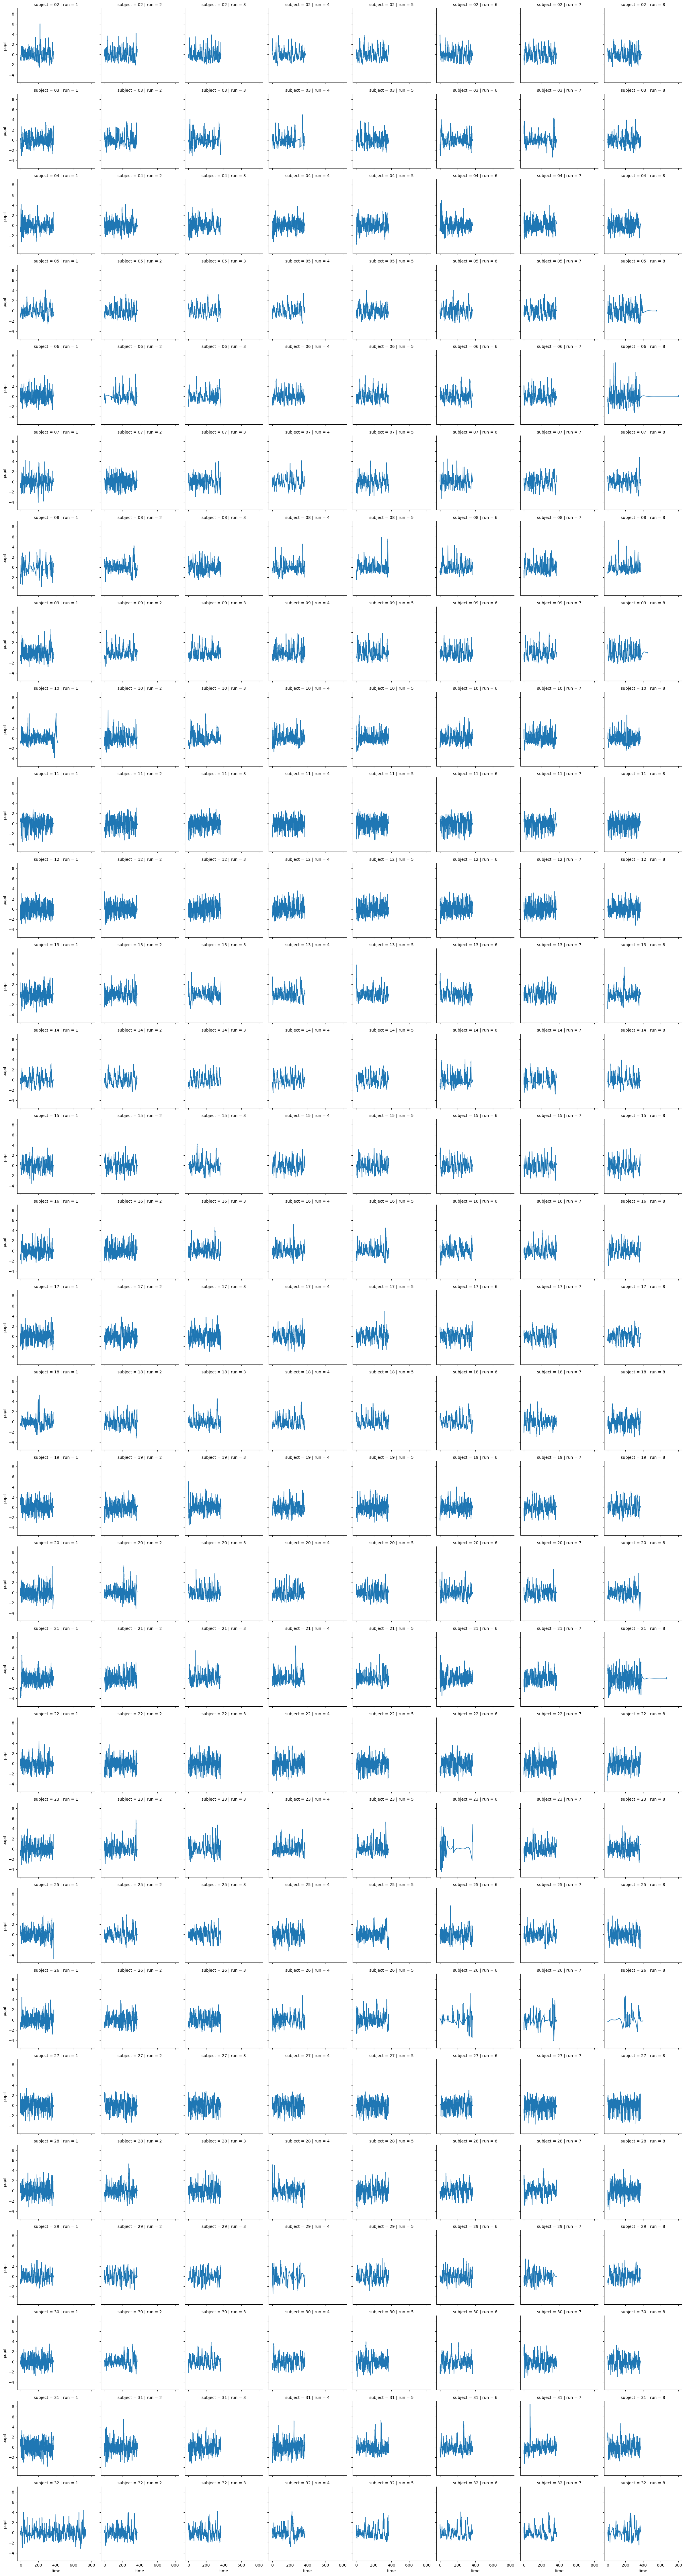

In [68]:
fac =sns.FacetGrid(pupil.reset_index(), col='run', row='subject')
# sns.lineplot(x='time', y='pupil', data=pupil.loc['32'].reset_index(), kind='line', col='run', col_wrap=4)
fac.map(sns.lineplot, 'time', 'pupil')